# Lab: Clustering
## DSC-6135: Introduction to Machine Learning and Computational Statistics

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd

# load sklearn libraries
from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

### Helper functions

In [18]:
def load_microbial_data():
    df = pd.read_csv("microbial_data.csv")
    X = df.values[:, 1:]
    return X

def plot_first_two_features(X):
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlabel('size (micrometer)')
    plt.ylabel('luminiscence score')
    return

def plot_clusters(X,z_predict, centers):
    plt.scatter(X[:, 0], X[:, 1], c=z_predict, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    return

## Analysis of microbial communities in Lake Kivu

Water resources experts from Rwanda and Democratic Republic of Congo and other stakeholders are discussing ways to make [Lake Kivu more resourceful](https://www.newtimes.co.rw/section/read/213391) to positively impact the peoples of both countries.

You have been contacted by a group of microbial biologists that are currently analyzing the ecosystem of lake Kivu in Rwanda. In particular, they are investigating how microbial communities assemble and change in the lake, and whether these processes are predictable.

They just sent you a dataset of microbial data.

In [19]:
X.shape

(4999, 6)

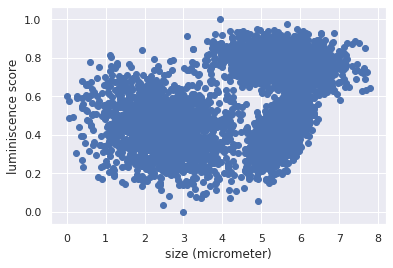

In [20]:
X = load_microbial_data()
plot_first_two_features(X)

### Let's try K-means first

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It makes the following assumptions:

* The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
* Each point is closer to its own cluster center than to other cluster centers.

## K-means

K-means runs `n_init` centroid initializations and chooses the best result that  minimizes the sum of squared distances to its centroid (referred as `inertia`).

#### Score option 1: inertia

In [52]:
# Run K-means
n_init = 20
kmeans = KMeans(n_clusters=3, random_state=0, n_init=n_init)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

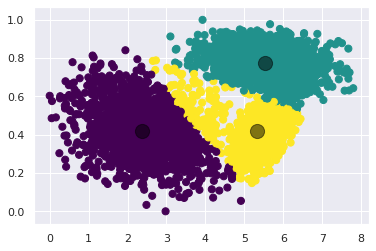

In [53]:
centers = kmeans.cluster_centers_
cluster_assignments = kmeans.predict(X) # here labels_ refer to cluster assignments
plot_clusters(X, cluster_assignments, centers)

#### Score option 2: Silhouette Coefficient

Compute the Silhouette coefficient of the previous model.￼

In [54]:
# Solution
metrics.silhouette_score(X, cluster_assignments, metric='euclidean')

0.44800818577871776

Run 10 simulations of K-means model and choose the one that presents the highest Silhouette score. Is this giving you a different result:

In [73]:
# Solution to best found score:
# best_score = -1
# for iter in range(n_init):
#     kmeans = KMeans(n_clusters=2, init='random', n_init=1, )
#     clusters = kmeans.fit_predict(X)
#     silhouette = metrics.silhouette_score(X, clusters, metric='euclidean')
#     print(silhouette)
#     if silhouette > best_score:
#         best_score = silhouette
#         best_kmeans = kmeans
# print(best_score)

Plot your results

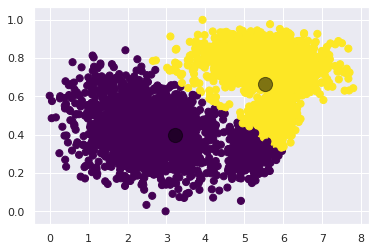

In [71]:
silhouette_centers = best_kmeans.cluster_centers_
silhouette_clusters = best_kmeans.predict(X) # here labels_ refer to cluster assignments
plot_clusters(X, silhouette_clusters, silhouette_centers)

### How to choose the optimal number of clusters K?

#### Elbow Method

Train a K-Means model for k = 1,..., 10 clusters and draw the inertia loss values with respect to the number of clusters. Can you identify the "elbow" and choose a correct number of clusters?

In [72]:
## Solution to Elbow question:
# sse = {}
# for k in range(1, 10):
#     kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
#     sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
# plt.figure()
# plt.plot(list(sse.keys()), list(sse.values()))
# plt.xlabel("Number of cluster")
# plt.ylabel("SSE")
# plt.show()

## Gaussian Mixture Models

It seems that K-means was not very good at capturing the shapes that we could visually observe from the first two features. Why was that? Can you have a guess?

Run a Gaussian mixture model on the previous dataset and compare with K-means

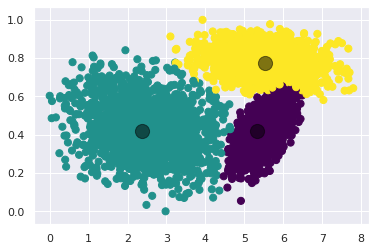

In [74]:
#Predict GMM cluster membership
gmm = GaussianMixture(n_components=3)
gmm_assignments = gmm.fit(X).predict(X)
plot_clusters(X,gmm_assignments, centers)

This seems much more structured. How may clusters should we choose with GMM?
Can you draw the silhouette coefficients for different number of clusters?

In [92]:
ss = np.zeros(8)
log_score = np.zeros(8)
for k in range(2,10):
    gmm = GaussianMixture(n_components=k)
    gmm_assignments = gmm.fit_predict(X)
    log_score[k-2] = gmm.score(X)
    ss[k-2] = metrics.silhouette_score(X,
                                  gmm_assignments, 
                                  metric='euclidean')
    print('k={} silhouette={}'.format(k,ss[k-2]))

k=2 silhouette=0.454923937010975
k=3 silhouette=0.4337287979727054
k=4 silhouette=0.37419570584790274
k=5 silhouette=0.27794653494021626
k=6 silhouette=0.24706990657729475
k=7 silhouette=0.22588902108016992
k=8 silhouette=0.23801386052848164
k=9 silhouette=0.24747613885907294


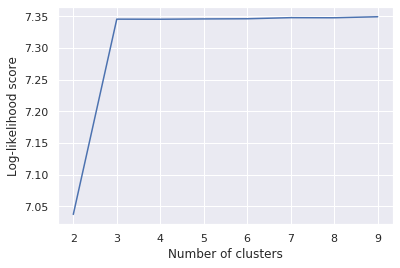

In [95]:
plt.plot(np.arange(2,10), log_score)
plt.xlabel("Number of clusters")
plt.ylabel("Log-likelihood score")
plt.show()

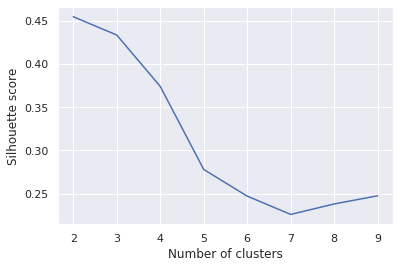

In [94]:
plt.plot(np.arange(2,10), ss)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

Given the first five data points, and a model with the number of clusters of choice, show the probability of each point belonging to each cluster?

In [98]:
gmm = GaussianMixture(n_components=3).fit(X)
gmm_proba = gmm.predict_proba(X[:5,:])
print(gmm_proba)

[[9.99609544e-01 7.87639296e-08 3.90377056e-04]
 [8.31486039e-01 1.74081908e-08 1.68513944e-01]
 [9.99824067e-01 1.81458423e-05 1.57787639e-04]
 [9.99826299e-01 6.48639647e-06 1.67214921e-04]
 [9.99637479e-01 6.96085011e-07 3.61824854e-04]]
